# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("../../assets/datasets/imdb_p6_sample.csv")
df.head()

y = df.rating

del df["title"]
del df["tconst"]
del df["HA"]
del df["rating"]
X = df
X['year'] = MinMaxScaler().fit_transform(X.year.astype(float).reshape(-1,1))

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [38]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

cv = KFold(len(y),shuffle=False)

dt = DecisionTreeRegressor(random_state=5)
dtScore = cross_val_score(dt,X,y, cv=3, verbose=True)
dtScore.mean()

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


-21.646296296296402

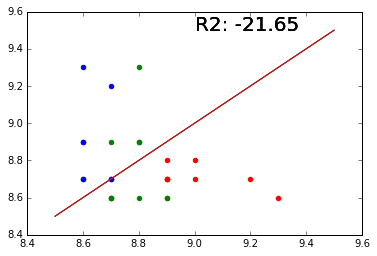

In [29]:
def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(dt, dtScore.mean().round(2))

#folds are colors

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=5)
rfScore = cross_val_score(rf,X,y,cv=3, n_jobs=-1)

print rfScore.mean(), dtScore.mean()

 -12.0154259259 -21.6462962963


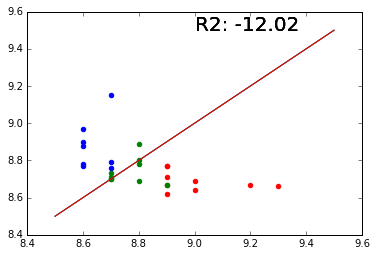

In [36]:
do_plot(rf,rfScore.mean().round(2))

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [34]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(random_state=5)
abScore = cross_val_score(ab,X,y,cv=3,n_jobs=1)
print abScore, rfScore, dtScore
print abScore.mean(), rfScore.mean(), dtScore.mean()

 [ -5.68196579  -5.80162273 -30.43703704] [ -5.20777778  -0.8625     -29.976     ] [ -5.05555556 -10.75       -49.13333333]
-13.9735418533 -12.0154259259 -21.6462962963


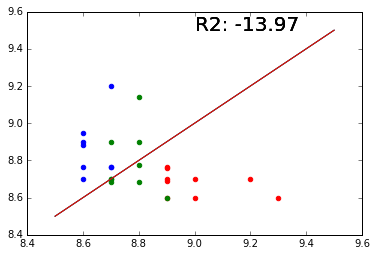

In [35]:
do_plot(ab,abScore.mean().round(2))

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=5)
gbScore = cross_val_score(ab,X,y,cv=3,n_jobs=1)
print abScore, rfScore, dtScore, gbScore
print abScore.mean(), rfScore.mean(), dtScore.mean(), gbScore.mean()

[ -5.68196579  -5.80162273 -30.43703704] [ -5.20777778  -0.8625     -29.976     ] [ -5.05555556 -10.75       -49.13333333] [ -5.68196579  -5.80162273 -30.43703704]
-13.9735418533 -12.0154259259 -21.6462962963 -13.9735418533


## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.